In [2]:
print("Hello world")

Hello world


In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("EPL.csv")

In [8]:
df

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,English Premier League,16/08/08,Arsenal,West Brom,1.0,0.0,H
1,English Premier League,16/08/08,Bolton,Stoke,3.0,1.0,H
2,English Premier League,16/08/08,Everton,Blackburn,2.0,3.0,A
3,English Premier League,16/08/08,Hull,Fulham,2.0,1.0,H
4,English Premier League,16/08/08,Middlesbrough,Tottenham,2.0,1.0,H
...,...,...,...,...,...,...,...
12785,English Premier League,12/05/2019,Liverpool,Wolves,2.0,0.0,H
12786,English Premier League,12/05/2019,Man United,Cardiff,0.0,2.0,A
12787,English Premier League,12/05/2019,Southampton,Huddersfield,1.0,1.0,D
12788,English Premier League,12/05/2019,Tottenham,Everton,2.0,2.0,D


In [10]:
df.head()

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,English Premier League,16/08/08,Arsenal,West Brom,1.0,0.0,H
1,English Premier League,16/08/08,Bolton,Stoke,3.0,1.0,H
2,English Premier League,16/08/08,Everton,Blackburn,2.0,3.0,A
3,English Premier League,16/08/08,Hull,Fulham,2.0,1.0,H
4,English Premier League,16/08/08,Middlesbrough,Tottenham,2.0,1.0,H


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12790 entries, 0 to 12789
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   League     12790 non-null  object 
 1   Date       12093 non-null  object 
 2   HomeTeam   12093 non-null  object 
 3   AwayTeam   12093 non-null  object 
 4   HomeGoals  12093 non-null  float64
 5   AwayGoals  12093 non-null  float64
 6   Result     12093 non-null  object 
dtypes: float64(2), object(5)
memory usage: 699.6+ KB


In [14]:
# Doing the label encoding here for the score calculation
df['Result'] = df['Result'].map({'H':1,'D':0,'A':-1})

In [16]:
df

,League,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,English Premier League,16/08/08,Arsenal,West Brom,1.0,0.0,1.0
1,English Premier League,16/08/08,Bolton,Stoke,3.0,1.0,1.0
2,English Premier League,16/08/08,Everton,Blackburn,2.0,3.0,-1.0
3,English Premier League,16/08/08,Hull,Fulham,2.0,1.0,1.0
4,English Premier League,16/08/08,Middlesbrough,Tottenham,2.0,1.0,1.0
...,...,...,...,...,...,...,...
12785,English Premier League,12/05/2019,Liverpool,Wolves,2.0,0.0,1.0
12786,English Premier League,12/05/2019,Man United,Cardiff,0.0,2.0,-1.0
12787,English Premier League,12/05/2019,Southampton,Huddersfield,1.0,1.0,0.0
12788,English Premier League,12/05/2019,Tottenham,Everton,2.0,2.0,0.0


In [18]:
# Dropping the unnecessary feature from the csv file
df.drop(columns=['League'],inplace= True)

In [20]:
df

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,16/08/08,Arsenal,West Brom,1.0,0.0,1.0
1,16/08/08,Bolton,Stoke,3.0,1.0,1.0
2,16/08/08,Everton,Blackburn,2.0,3.0,-1.0
3,16/08/08,Hull,Fulham,2.0,1.0,1.0
4,16/08/08,Middlesbrough,Tottenham,2.0,1.0,1.0
...,...,...,...,...,...,...
12785,12/05/2019,Liverpool,Wolves,2.0,0.0,1.0
12786,12/05/2019,Man United,Cardiff,0.0,2.0,-1.0
12787,12/05/2019,Southampton,Huddersfield,1.0,1.0,0.0
12788,12/05/2019,Tottenham,Everton,2.0,2.0,0.0


In [40]:
# For the date segregation
df['Year'] = df['Date'].dt.year 
df.drop(columns=['Date'],inplace=True)
df

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year
0,Arsenal,West Brom,1.0,0.0,1.0,2008.0
1,Bolton,Stoke,3.0,1.0,1.0,2008.0
2,Everton,Blackburn,2.0,3.0,-1.0,2008.0
3,Hull,Fulham,2.0,1.0,1.0,2008.0
4,Middlesbrough,Tottenham,2.0,1.0,1.0,2008.0
...,...,...,...,...,...,...
12785,Liverpool,Wolves,2.0,0.0,1.0,2019.0
12786,Man United,Cardiff,0.0,2.0,-1.0,2019.0
12787,Southampton,Huddersfield,1.0,1.0,0.0,2019.0
12788,Tottenham,Everton,2.0,2.0,0.0,2019.0


In [42]:
teams = df['HomeTeam'].unique()

In [44]:
len(teams)

52

In [46]:
teams

array(['Arsenal', 'Bolton', 'Everton', 'Hull', 'Middlesbrough',
       'Sunderland', 'West Ham', 'Aston Villa', 'Chelsea', 'Man United',
       'Blackburn', 'Fulham', 'Liverpool', 'Newcastle', 'Stoke',
       'Tottenham', 'West Brom', 'Man City', 'Wigan', 'Portsmouth',
       'Wolves', 'Birmingham', 'Blackpool', 'Brentford', 'Burnley',
       'Leicester', 'Watford', 'Norwich', 'Crystal Palace', 'Leeds',
       'Brighton', 'Southampton', 'QPR', 'Swansea', nan, 'Bournemouth',
       'Sheffield United', 'Charlton', 'Coventry', 'Derby', 'Bradford',
       'Ipswich', 'Sheffield Weds', 'Wimbledon', "Nott'm Forest",
       'Huddersfield', 'Reading', 'Barnsley', 'Cardiff', 'Luton',
       'Oldham', 'Swindon'], dtype=object)

In [62]:
# Encoding the home team and the away team using the label encoding
le = LabelEncoder()
df['HomeTeam'] = le.fit_transform(df['HomeTeam'])
df['AwayTeam'] = le.fit_transform(df['AwayTeam'])
df.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year
0,0,46,1.0,0.0,1.0,2008.0
1,6,40,3.0,1.0,1.0,2008.0
2,18,4,2.0,3.0,-1.0,2008.0
3,21,19,2.0,1.0,1.0,2008.0
4,29,44,2.0,1.0,1.0,2008.0


In [64]:
df['HomeTeam'].unique()

array([ 0,  6, 18, 21, 29, 41, 47,  1, 14, 28,  4, 19, 25, 30, 40, 44, 46,
       27, 48, 34, 50,  3,  5,  9, 11, 24, 45, 31, 16, 23, 10, 39, 35, 42,
       51,  7, 37, 13, 15, 17,  8, 22, 38, 49, 32, 20, 36,  2, 12, 26, 33,
       43], dtype=int64)

In [68]:
# Feture Engineering to club up the attributes to one column
df['Goal_Diff'] = df['HomeGoals'] - df['AwayGoals']
df

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Goal_Diff
0,0,46,1.0,0.0,1.0,2008.0,1.0
1,6,40,3.0,1.0,1.0,2008.0,2.0
2,18,4,2.0,3.0,-1.0,2008.0,-1.0
3,21,19,2.0,1.0,1.0,2008.0,1.0
4,29,44,2.0,1.0,1.0,2008.0,1.0
...,...,...,...,...,...,...,...
12785,25,50,2.0,0.0,1.0,2019.0,2.0
12786,28,12,0.0,2.0,-1.0,2019.0,-2.0
12787,39,20,1.0,1.0,0.0,2019.0,0.0
12788,44,18,2.0,2.0,0.0,2019.0,0.0


In [72]:
# Creating the home and away result flag
df['Home_Wins'] = (df['Result']==1).astype(int)
df['Away_Wins'] = (df['Result']==-1).astype(int)
df['Draw'] = (df['Result']==0).astype(int)
df

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Goal_Diff,Home_Wins,Away_Wins,Draw
0,0,46,1.0,0.0,1.0,2008.0,1.0,1,0,0
1,6,40,3.0,1.0,1.0,2008.0,2.0,1,0,0
2,18,4,2.0,3.0,-1.0,2008.0,-1.0,0,1,0
3,21,19,2.0,1.0,1.0,2008.0,1.0,1,0,0
4,29,44,2.0,1.0,1.0,2008.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
12785,25,50,2.0,0.0,1.0,2019.0,2.0,1,0,0
12786,28,12,0.0,2.0,-1.0,2019.0,-2.0,0,1,0
12787,39,20,1.0,1.0,0.0,2019.0,0.0,0,0,1
12788,44,18,2.0,2.0,0.0,2019.0,0.0,0,0,1


In [78]:
# Droping the unnecessary feature
df.drop(columns=['HomeGoals','AwayGoals','Result'],inplace= True)

In [82]:
df

,HomeTeam,AwayTeam,Year,Goal_Diff,Home_Wins,Away_Wins,Draw
0,0,46,2008.0,1.0,1,0,0
1,6,40,2008.0,2.0,1,0,0
2,18,4,2008.0,-1.0,0,1,0
3,21,19,2008.0,1.0,1,0,0
4,29,44,2008.0,1.0,1,0,0
...,...,...,...,...,...,...,...
12785,25,50,2019.0,2.0,1,0,0
12786,28,12,2019.0,-2.0,0,1,0
12787,39,20,2019.0,0.0,0,0,1
12788,44,18,2019.0,0.0,0,0,1


In [84]:
print(df.describe())

           HomeTeam      AwayTeam          Year     Goal_Diff     Home_Wins  \
count  12790.000000  12790.000000  12093.000000  12093.000000  12790.000000   
mean      26.484519     26.480219   2008.630944      0.368312      0.432682   
std       15.490082     15.497521      9.277648      1.793959      0.495467   
min        0.000000      0.000000   1993.000000     -9.000000      0.000000   
25%       14.000000     14.000000   2000.000000     -1.000000      0.000000   
50%       27.000000     27.000000   2009.000000      0.000000      0.000000   
75%       40.000000     40.000000   2017.000000      1.000000      1.000000   
max       51.000000     51.000000   2025.000000      9.000000      1.000000   

          Away_Wins          Draw  
count  12790.000000  12790.000000  
mean       0.271931      0.240891  
std        0.444972      0.427641  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  


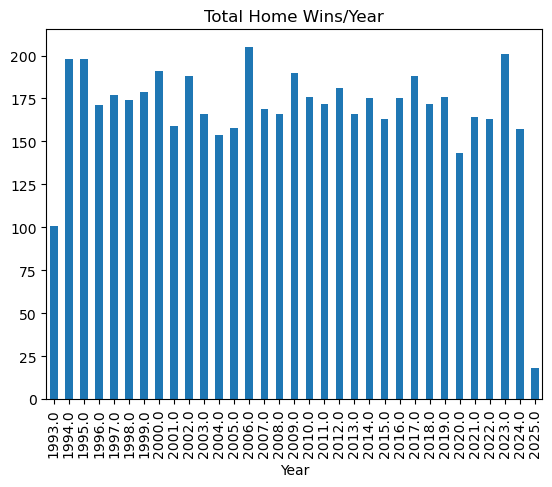

In [92]:
# analysing the team performance over the year
df.groupby('Year')['Home_Wins'].sum().plot(kind='bar',title='Total Home Wins/Year')
plt.show()

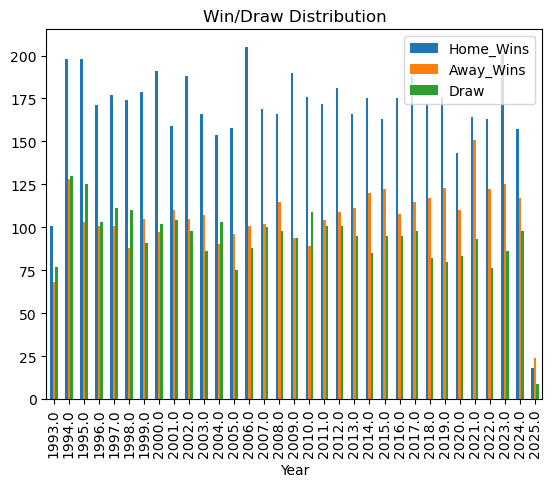

In [96]:
# Home and Away performance
df.groupby('Year')[['Home_Wins','Away_Wins','Draw']].sum().plot(kind='bar',title='Win/Draw Distribution')
plt.show()

In [ ]:
# Goal Distribution over the year
